<a href="https://colab.research.google.com/github/TihamHossainKhan/Visual-ML-using-YellowBrick-of-Predicting-Poker-Hand/blob/master/Visual_Machine_Learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align:center;">Poker Hand Classification using Random Forests</h2>

Standard Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

### About the Data

***

![Alt text](https://farm4.staticflickr.com/3585/3299226824_4637597b74_z_d.jpg "Cards by bl0ndeeo2, Creative Commons License (https://flic.kr/p/62xpc7) ")

The [dataset](http://archive.ics.uci.edu/ml/datasets/Poker+Hand) discussed here is the Poker Hand data from the UCI Machine Learning Repository.

**Poker Manual:**
Each record in the dataset is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. The target column describes the hand, with the possibilities being:    

    0: Nothing in hand; not a recognized poker hand     
    1: One pair; one pair of equal ranks within five cards     
    2: Two pairs; two pairs of equal ranks within five cards     
    3: Three of a kind; three equal ranks within five cards     
    4: Straight; five cards, sequentially ranked with no gaps     
    5: Flush; five cards with the same suit     
    6: Full house; pair + different rank three of a kind     
    7: Four of a kind; four equal ranks within five cards     
    8: Straight flush; straight + flush     
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush     
    
The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for each suit).

In [2]:
poker_df = pd.read_csv('poker-hand-testing.csv')
poker_df.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


### Separate the Data into Features and Targets
***

***

In [3]:
poker_df.columns =  ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
                     'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
                   'four_of_a_kind', 'straight_flush', 'royal_flush']


# Separate the data into features (X) and targets (y)

X = poker_df.iloc[:, 0:9]
Y = poker_df.hand

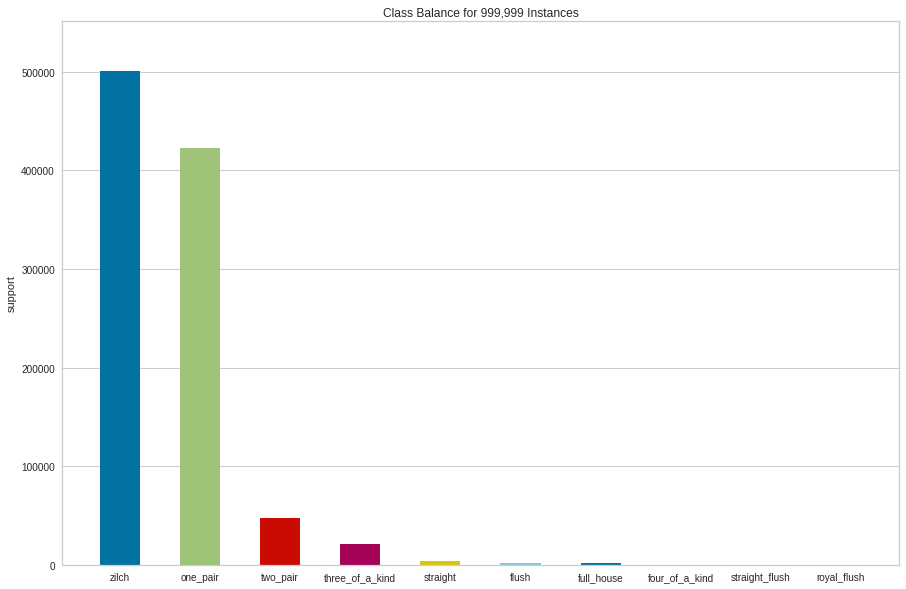

In [4]:
########## EVALUATING CLASS BALANCE #########

from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
balance = ClassBalance(size=(1080, 720), labels = labels)

balance.fit(Y)
balance.poof()




###Upsampling from Minority Classes
***

***

In [5]:
poker_df.loc[poker_df['hand'] >= 5, 'hand'] = 5
Y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

###Training the Random Forests Classifier
***

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

clf = RandomForestClassifier(n_estimators=100,
                             class_weight= 'balanced',
                             n_jobs= -1)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

###Classification Accuracy

***

In [7]:
Y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy : ', accuracy_score(Y_test, Y_pred))

Accuracy :  0.67423


###ROC Curve and AUC 
***


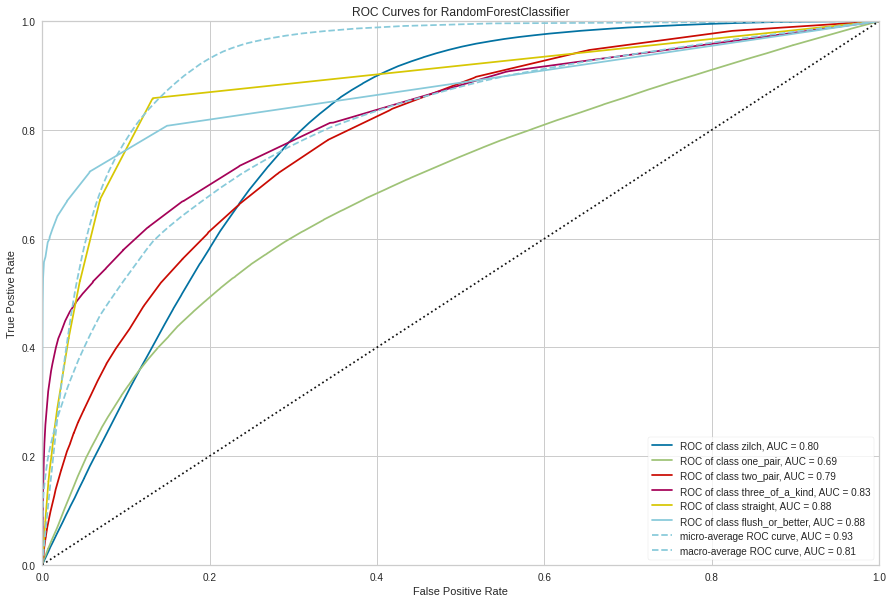

In [8]:
from yellowbrick.classifier import ROCAUC
rocauc = ROCAUC(clf, size=(1080, 720), classes=labels)

rocauc.score(X_test, Y_test)
rocauc.poof()

 ###Classification Report Heatmap
 ***

0.67423

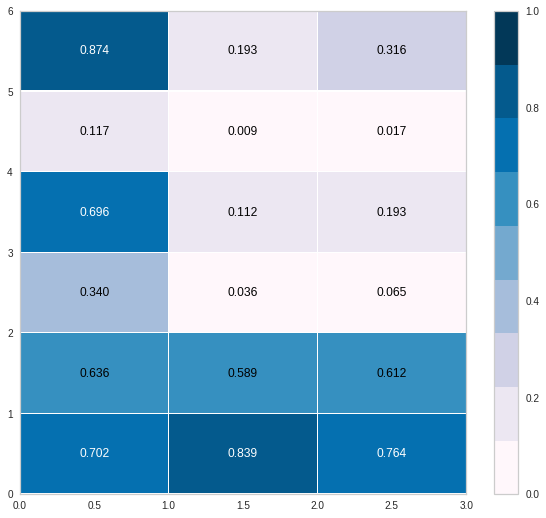

In [9]:
report = ClassificationReport(clf, size=(720, 640), classes=labels, cmap='PuBu')
report.score(X_test, Y_test)

### Class Prediction Error
***

0.67423

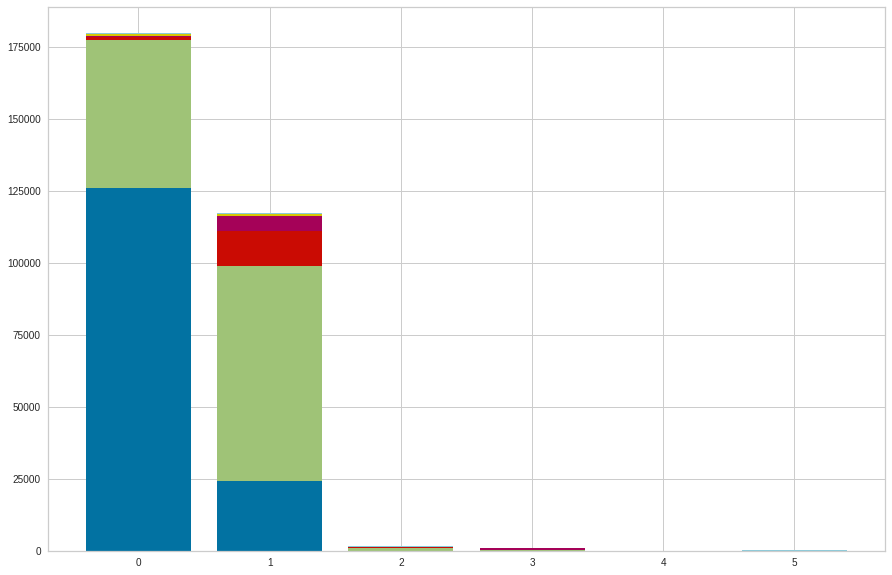

In [10]:
error = ClassPredictionError(clf, size=(1080, 720), classes=labels)
error.score(X_test, Y_test)